### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.easy_test()

### Exact solution

In [2]:
from Dynamic_programming.classic_knapsack import Dynamic_Programming_QKP_solver

dp_solver = Dynamic_Programming_QKP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_results()

 - Solution has items:  [1, 2]
Profit: 225
Weight: 50 (satisfies constraint W=50)
Energy: -225.0


### Simulated annealing

In [3]:
from Annealing_ham.QKP_ham import QKP_Hamiltonian

H_solver = QKP_Hamiltonian(W_capacity, weights, values)
H_solver.run_simulated_annealing_neal()
H_solver.show_results()

H_solver.energy_of_items(items_in_solution)


offset:  -140.631
 - Solution has items:  [0, 1, 2]
Profit: 317
Weight: 60 (does NOT satisfy constraint W=50)
Energy: -303.687
 - Evaluating candidate  [1, 2]
Profit: 225
Weight: 50 (satisfies constraint W=50)
Energy: -225.0


[Qibo 0.2.7|INFO|2024-05-02 17:40:44]: Using numpy backend on /CPU:0


Target energy -163.056
Target energy with offset -303.687
final annealing energy:  -159.45704890573717
final state:  [ 3.37639518e-01+0.92377136j -9.03823978e-02+0.07409084j
 -1.17773846e-01-0.0166775j   1.80912148e-02-0.0050305j
 -1.02816328e-02-0.06492398j -1.67238639e-03-0.01187196j
 -4.22393961e-03+0.00134103j  3.81008545e-05-0.00140458j]
most probable candidate:  0b0


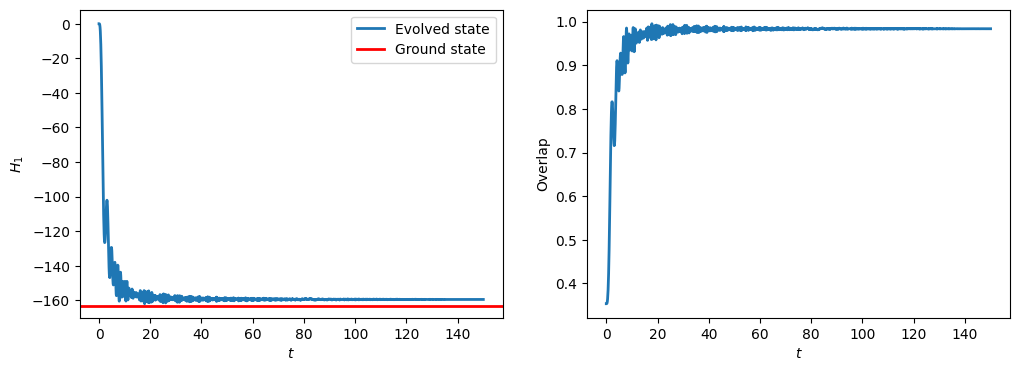

In [4]:
T = 150 # Total time of the adiabatic evolution.

H_solver.build_Hamiltonian()
H_solver.run_simulated_annealing_qibo(T)
H_solver.show_qibo_results()

### DMRG

In [6]:
from DMRG.script import QKP_DMRG

h_coeffs, J_coeffs, offset = H_solver.get_ham_coeffs()
chi = 32
numsweeps = 15
qkp_DMRG = QKP_DMRG(N, chi, numsweeps, h_coeffs, J_coeffs, offset)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)
qkp_DMRG.run()
qkp_DMRG.show_results()

qkp_DMRG.energy_of_items('111')


Sweep: 1 of 15, Loc: 1,Energy: -163.042644
Sweep: 1 of 15, Loc: 0,Energy: -163.056000
Sweep: 1 of 15, Loc: 0,Energy: -163.056000
Sweep: 1 of 15, Loc: 1,Energy: -163.056000
Sweep: 2 of 15, Loc: 1,Energy: -163.056000
Sweep: 2 of 15, Loc: 0,Energy: -163.056000
Sweep: 2 of 15, Loc: 0,Energy: -163.056000
Sweep: 2 of 15, Loc: 1,Energy: -163.056000
Sweep: 3 of 15, Loc: 1,Energy: -163.056000
Sweep: 3 of 15, Loc: 0,Energy: -163.056000
Sweep: 3 of 15, Loc: 0,Energy: -163.056000
Sweep: 3 of 15, Loc: 1,Energy: -163.056000
Sweep: 4 of 15, Loc: 1,Energy: -163.056000
Sweep: 4 of 15, Loc: 0,Energy: -163.056000
Sweep: 4 of 15, Loc: 0,Energy: -163.056000
Sweep: 4 of 15, Loc: 1,Energy: -163.056000
Sweep: 5 of 15, Loc: 1,Energy: -163.056000
Sweep: 5 of 15, Loc: 0,Energy: -163.056000
Sweep: 5 of 15, Loc: 0,Energy: -163.056000
Sweep: 5 of 15, Loc: 1,Energy: -163.056000
Sweep: 6 of 15, Loc: 1,Energy: -163.056000
Sweep: 6 of 15, Loc: 0,Energy: -163.056000
Sweep: 6 of 15, Loc: 0,Energy: -163.056000
Sweep: 6 of